Number of clusters: 18


['mean texture',
 'texture error',
 'mean fractal dimension',
 'worst fractal dimension',
 'fractal dimension error',
 'mean smoothness',
 'worst smoothness',
 'mean symmetry',
 'worst symmetry',
 'smoothness error',
 'symmetry error',
 'compactness error',
 'concave points error',
 'mean concave points',
 'mean concavity',
 'mean compactness',
 'mean radius',
 'radius error']

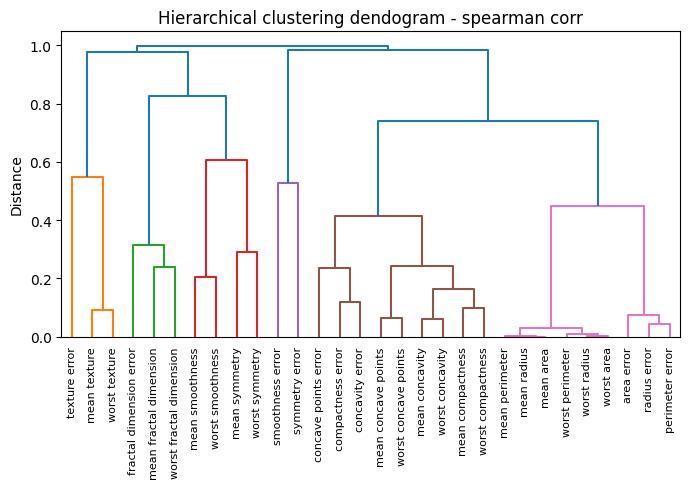

In [1]:
# Removing highly correlated columns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt


x_data,y_data = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
classes = list(set(y_data))
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data)


corr_matrix = x_data.corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
fig,ax = plt.subplots(1,1,figsize=(7,5))
dendogram = hierarchy.dendrogram(
    linkage_matrix, ax=ax, 
    labels=corr_matrix.columns.tolist(),
)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
_ = ax.set_ylabel('Distance')
_ = ax.set_title('Hierarchical clustering dendogram - spearman corr')
fig.tight_layout()



def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))
    
    print(f'Number of clusters: {n_clusters}')
    
    cluster_features = {}
    
    for label in range(1, n_clusters + 1):
        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()
        
    return cluster_features



clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters
filtered_features = [column[0] for column in clusters.values()]
filtered_features

